In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Neural SD

In [74]:
ts = pd.read_csv('/data/ds-risk/derivatives/pupil/model-neural2/timeseries.tsv', sep='\t', index_col=['subject', 'event type', 'covariate', 'time'])

In [75]:
from mne.stats import permutation_cluster_1samp_test

In [76]:
ts = ts.xs('n1', 0, 1).xs('sd', 0, 1)

tmp = ts.unstack('time')['pupil']

In [77]:
Ot_obs, clusters, cluster_pv, H0 = permutation_cluster_1samp_test(tmp.values)

Using a threshold of 2.045230
stat_fun(H1): min=-0.689689 max=3.201665
Running initial clustering …
Found 1 cluster


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

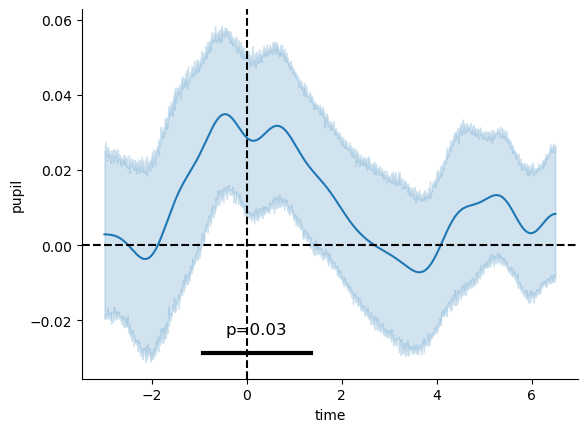

In [87]:
sns.lineplot(ts.reset_index(), x='time', y='pupil')
sns.despine()

ts

for p, cl in zip(cluster_pv, clusters):
    times = ts.index.get_level_values('time')[cl] 
    y = ts.loc[(slice(None), times), :].mean() - ts.loc[(slice(None), times), :].std()
    plt.plot([times.min(), times.max()], [y, y], lw=3, c='k')
    plt.text(times.values.mean(), y+0.005, f'p={p:.2f}', ha='center', fontsize=12.)

plt.axhline(0.0, c='k', ls='--')
plt.axvline(0.0, c='k', ls='--')